In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src import model_saver, multiple_linear_regression, regression_plotter
from sklearn.datasets import load_iris

# Basic functioning

We will first train our model in the 1D scenario
$$\hat{y} = b + w_1 x_1$$

We will select the first two features of iris for this toy example

In [2]:
data = load_iris()
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
X = data.data[:, :1]
y = data.data[:, 2:3]
X.shape, y.shape

((150, 1), (150, 1))

**Q**: what are we trying to predict/model and how?

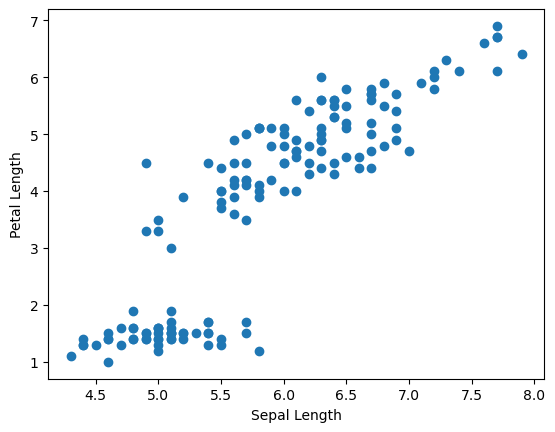

In [21]:
plt.scatter(X, y)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

We can now fit our linear regression model

In [22]:
model_1d = multiple_linear_regression.MultipleLinearRegression()
model_1d.train(X, y)
model_1d.get_parameters()

{'weights': [1.858432978254922], 'intercept': -7.101443369602931}

Let' see if the plotting works

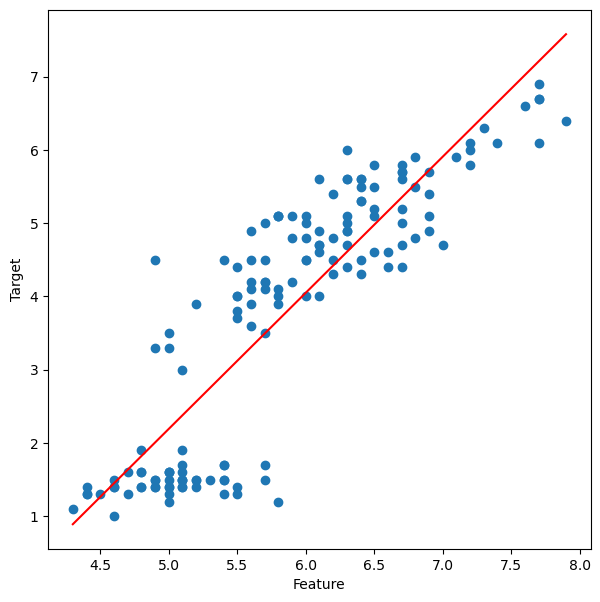

In [23]:
plotter_1d = regression_plotter.RegressionPlotter(model_1d)
plotter_1d.plot(X, y)

Let's try the save functions...

In [7]:
saver = model_saver.ModelSaver()

saver.save(model_1d, 'iris_1d.json', 'json')
saver.save(model_1d, 'iris_1d.pickle', 'pickle')


Let's inspect these files...

In [8]:
# run this for windows
! more iris_1d.json

# run this for unix
# ! cat iris_1d.json

{"weights": [1.858432978254922], "intercept": -7.101443369602931}


In [9]:
import pickle

with open('iris_1d.pickle', 'rb') as f:
    model_1d_content = pickle.load(f)
model_1d_content

{'weights': [1.858432978254922], 'intercept': -7.101443369602931}

To check if the loading works correctly, we will first corrupt the parameters, then reload...

In [10]:
model_1d.set_parameters({"intercept": 0.0, "weights": [0.0, 11]})
model_1d.get_parameters()

{'weights': [0.0, 11.0], 'intercept': 0.0}

In [11]:
saver.load(model_1d, 'iris_1d.json', 'json')
model_1d.get_parameters()

{'weights': [1.858432978254922], 'intercept': -7.101443369602931}

Now, for pickle...

In [12]:
model_1d.set_parameters({"intercept": 0.0, "weights": [0.0, 11]})
print(model_1d.get_parameters())

saver.load(model_1d, 'iris_1d.pickle', 'pickle')
print(model_1d.get_parameters())

{'weights': [0.0, 11.0], 'intercept': 0.0}
{'weights': [1.858432978254922], 'intercept': -7.101443369602931}


Now, on to bigger models...

We will do

$$
\text{Petal Length} \sim \text{Sepal Length} + \text{Sepal Width}
$$


In [28]:
X = data.data[:, :2]
model_2d = multiple_linear_regression.MultipleLinearRegression()
model_2d.train(X, y)
model_2d.get_parameters()

{'weights': [1.7755925464811932, -1.3386232887388432],
 'intercept': -2.5247615118342077}

c:\Users\mzullich\Documents\assignment_1_solved\src\regression_plotter.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


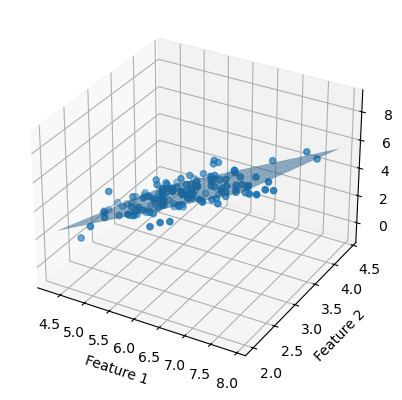

In [29]:
plotter_2d = regression_plotter.RegressionPlotter(model_2d)
plotter_2d.plot(X, y)

This is the basic functioning of the plotter, but, with 2-d `X`, we should also be able to plot sequences of 2d plots...

c:\Users\mzullich\Documents\assignment_1_solved\src\regression_plotter.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


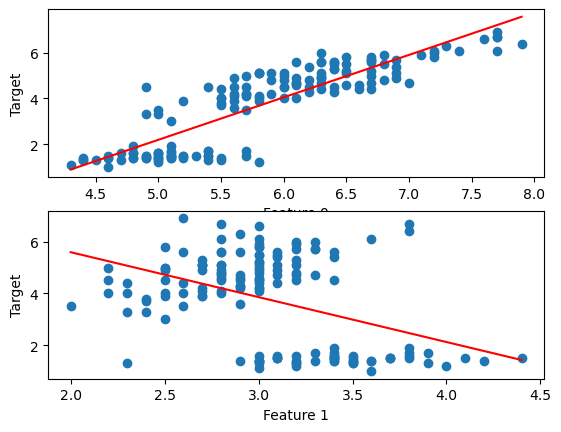

In [6]:
plotter_2d.plot(X, y, plot_3d_if_2_covariates=False)